In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Machine learning/Creating ML models/diamonds.csv',index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53940, 10)

In [5]:
data=data.sample(frac=0.2)

In [6]:
data.shape

(10788, 10)

In [7]:
data.reset_index(inplace=True,drop=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.54,Ideal,G,VVS1,60.8,57.0,16169,7.45,7.49,4.54
1,1.20,Premium,J,VS2,60.3,59.0,4715,6.90,6.94,4.17
2,0.70,Very Good,F,VS1,59.9,60.0,2810,5.77,5.84,3.48
3,1.72,Premium,G,VS1,59.4,60.0,17765,7.86,7.82,4.66
4,2.32,Fair,H,SI1,62.0,62.0,18026,8.47,8.31,5.20


In [8]:
correleation=data.corr()
correleation

,carat,depth,table,price,x,y,z
carat,1.000000,0.030004,0.187484,0.924908,0.973594,0.947645,0.961537
depth,0.030004,1.000000,-0.306918,0.000136,-0.022752,-0.024747,0.097872
table,0.187484,-0.306918,1.000000,0.132819,0.199989,0.187037,0.158879
price,0.924908,0.000136,0.132819,1.000000,0.884538,0.863183,0.871851
x,0.973594,-0.022752,0.199989,0.884538,1.000000,0.973293,0.981773
y,0.947645,-0.024747,0.187037,0.863183,0.973293,1.000000,0.962422
z,0.961537,0.097872,0.158879,0.871851,0.981773,0.962422,1.000000


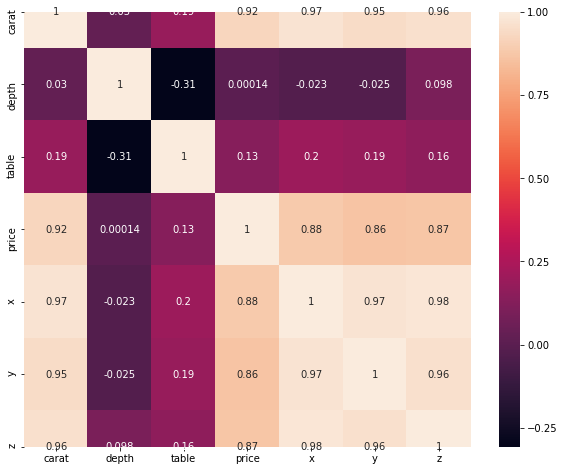

In [10]:
plt.subplots(figsize=(10,8))
sns.heatmap(correleation,annot=True)
plt.show()

In [11]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [12]:
data['color'].unique()

array(['G', 'J', 'F', 'H', 'D', 'E', 'I'], dtype=object)

In [13]:
data['clarity'].unique()

array(['VVS1', 'VS2', 'VS1', 'SI1', 'VVS2', 'SI2', 'I1', 'IF'],
      dtype=object)

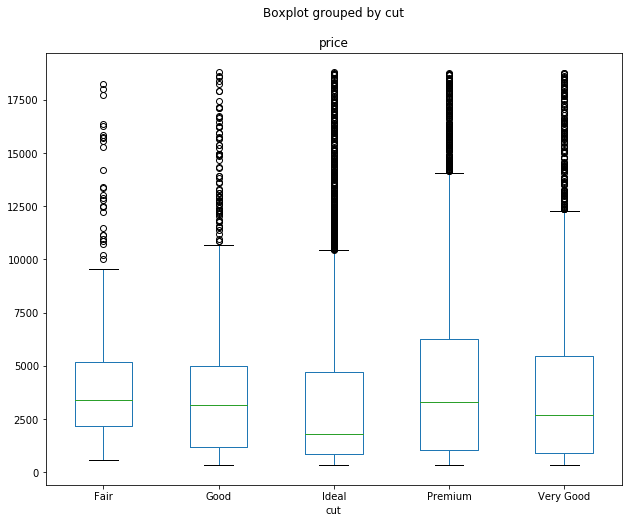

In [14]:
data.boxplot(by='cut',column=['price'],grid=False,figsize=(10,8))

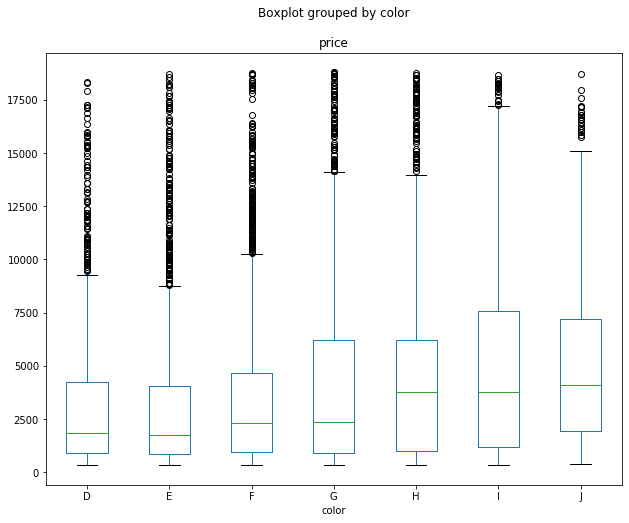

In [15]:
data.boxplot(by='color',column=['price'],grid=False,figsize=(10,8))

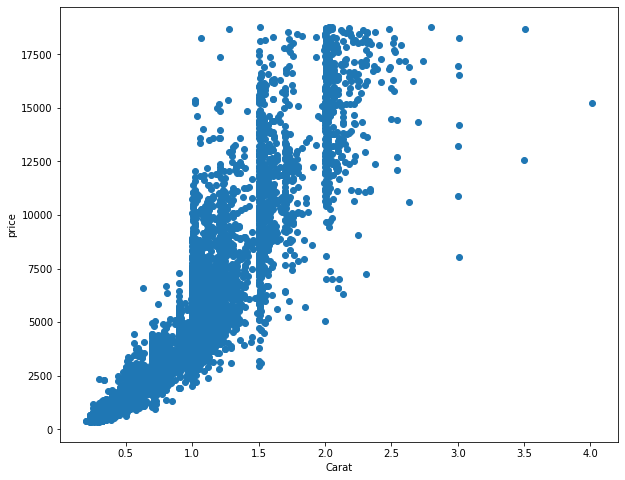

In [16]:
plt.subplots(figsize=(10,8))
plt.scatter(data['carat'],data['price'])
plt.xlabel("Carat")
plt.ylabel("price")
plt.show()

In [17]:
clarity_dic={"IF":7,"VVS1":6, "VS2":3, "VS1":4, "SI1":2, "VVS2":5, "SI2":1, "I1":0}
data['clarity'].replace(clarity_dic,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.54,Ideal,G,6,60.8,57.0,16169,7.45,7.49,4.54
1,1.20,Premium,J,3,60.3,59.0,4715,6.90,6.94,4.17
2,0.70,Very Good,F,4,59.9,60.0,2810,5.77,5.84,3.48
3,1.72,Premium,G,4,59.4,60.0,17765,7.86,7.82,4.66
4,2.32,Fair,H,2,62.0,62.0,18026,8.47,8.31,5.20


In [18]:
data=pd.get_dummies(data,columns=['cut','color'])
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1.54,6,60.8,57.0,16169,7.45,7.49,4.54,0,0,1,0,0,0,0,0,1,0,0,0
1,1.20,3,60.3,59.0,4715,6.90,6.94,4.17,0,0,0,1,0,0,0,0,0,0,0,1
2,0.70,4,59.9,60.0,2810,5.77,5.84,3.48,0,0,0,0,1,0,0,1,0,0,0,0
3,1.72,4,59.4,60.0,17765,7.86,7.82,4.66,0,0,0,1,0,0,0,0,1,0,0,0
4,2.32,2,62.0,62.0,18026,8.47,8.31,5.20,1,0,0,0,0,0,0,0,0,1,0,0


In [19]:
numeric_feature=['carat','depth','table','x','y','z']
numeric_df=data[numeric_feature]
numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.801419,61.751863,57.439108,5.740184,5.745201,3.543327
std,0.473861,1.406589,2.209826,1.120393,1.139828,0.695313
min,0.200000,52.300000,52.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.720000,4.730000,2.910000
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,4.010000,72.200000,73.000000,10.140000,31.800000,6.170000


In [20]:
from sklearn.preprocessing import scale

In [22]:
numeric_array=scale(numeric_df)
numeric_array[:5]

array([[ 1.55871686, -0.67674852, -0.19871634,  1.52615673,  1.53082687,
         1.43348261],
       [ 0.84117355, -1.03223475,  0.70637407,  1.03523491,  1.04827567,
         0.90132364],
       [-0.21403719, -1.31662374,  1.15891928,  0.02661373,  0.08317327,
        -0.09108094],
       [ 1.93859273, -1.67210997,  1.15891928,  1.89211662,  1.82035759,
         1.60607472],
       [ 3.20484562,  0.17641845,  2.0640097 ,  2.43659354,  2.25026684,
         2.38273917]])

In [23]:
numeric_df=pd.DataFrame(numeric_array,columns=numeric_df.columns)
numeric_df.describe()

,carat,depth,table,x,y,z
count,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04
mean,2.636831e-16,-6.624763e-15,1.449220e-15,-2.393545e-16,-4.750248e-16,-3.156952e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.269248e+00,-6.720014e+00,-2.461442e+00,-5.123602e+00,-5.040643e+00,-5.096252e+00
25%,-8.471636e-01,-4.634568e-01,-6.512616e-01,-9.106006e-01,-8.907028e-01,-9.108934e-01
50%,-1.929330e-01,3.422395e-02,-1.987163e-01,-2.694138e-02,-2.211063e-02,-1.916757e-02
75%,5.035061e-01,5.319047e-01,7.063741e-01,7.139043e-01,6.973293e-01,7.143489e-01
max,6.771458e+00,7.428338e+00,7.042007e+00,3.927211e+00,2.285959e+01,3.777859e+00


In [31]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,6,16169,0,0,1,0,0,0,0,0,1,0,0,0
1,3,4715,0,0,0,1,0,0,0,0,0,0,0,1
2,4,2810,0,0,0,0,1,0,0,1,0,0,0,0
3,4,17765,0,0,0,1,0,0,0,0,1,0,0,0
4,2,18026,1,0,0,0,0,0,0,0,0,1,0,0


In [30]:
data.drop(numeric_feature,inplace=True,axis=1)


KeyError: "['carat' 'depth' 'table' 'x' 'y' 'z'] not found in axis"

In [32]:
data=pd.concat([data,numeric_df],axis=1)
data.shape

(10788, 20)

In [33]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,6,16169,0,0,1,0,0,0,0,0,1,0,0,0,1.558717,-0.676749,-0.198716,1.526157,1.530827,1.433483
1,3,4715,0,0,0,1,0,0,0,0,0,0,0,1,0.841174,-1.032235,0.706374,1.035235,1.048276,0.901324
2,4,2810,0,0,0,0,1,0,0,1,0,0,0,0,-0.214037,-1.316624,1.158919,0.026614,0.083173,-0.091081
3,4,17765,0,0,0,1,0,0,0,0,1,0,0,0,1.938593,-1.672110,1.158919,1.892117,1.820358,1.606075
4,2,18026,1,0,0,0,0,0,0,0,0,1,0,0,3.204846,0.176418,2.064010,2.436594,2.250267,2.382739


In [36]:
data.to_csv('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Machine learning/Creating ML models/diamonds_processed.csv',index=False)

In [37]:
%ls


 Volume in drive C is OSDISK
 Volume Serial Number is 687E-4025

 Directory of C:\Users\shubham.chhetri\Desktop\MYPROJECT\Machine learning\Creating ML models

05-Jul-20  09:49 PM    <DIR>          .
05-Jul-20  09:49 PM    <DIR>          ..
05-Jul-20  08:50 PM    <DIR>          .ipynb_checkpoints
05-Jul-20  02:43 PM            37,658 Boston.csv
20-Sep-19  04:24 PM         3,192,560 diamonds.csv
05-Jul-20  09:49 PM         1,608,622 diamonds_processed.csv
05-Jul-20  03:09 PM           156,520 LinearRegressionWithNumericalData.ipynb
05-Jul-20  09:48 PM           199,972 RegressionUsingCategoricalData.ipynb
               5 File(s)      5,195,332 bytes
               3 Dir(s)  388,195,143,680 bytes free


In [39]:
from sklearn.model_selection import train_test_split
x=data.drop('price',axis=1)
y=data['price']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred=linear_regression.predict(x_test)
y_pred

array([14149.70782559,  4694.16226624,  -500.24306791, ...,
        3404.21147515,  7059.72837441,  8393.08557549])

In [43]:
print("training score:",linear_regression.score(x_train,y_train))

training score: 0.9148500256871777


In [44]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("testing score",score)

testing score 0.8451609774925155
